## Compare plots

The `plot_compare()` function from `ArviZ` helps visualize a comparison between multiple models using Leave-One-Out Cross-Validation (LOO-CV) which is approximated using Pareto-Smooth-Importance-Sampling (PSIS). 

Currently, there is no equivalent function in the [bayesplot](https://mc-stan.org/bayesplot/reference/MCMC-intervals.html) package. 

## Analysis of current defaults

@fig-compare shows the current defaults for comparing two different models that explain the eight schools dataset. The model displays with white empty points the models elpds, and the black dots are the elpd's in sample estimates.

/Users/asael_am/opt/miniconda3/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


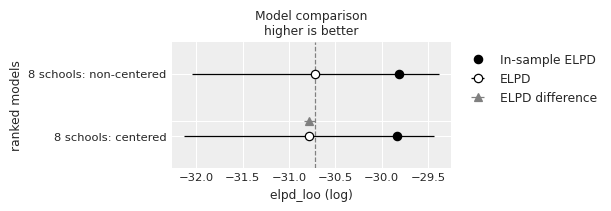

In [1]:
#| warning: false
#| label: fig-compare
#| fig-cap: "Posterior estimates for theta, 8 schools example, chains combined"

import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

model_compare = az.compare({'8 schools: centered': az.load_arviz_data('centered_eight'),
                            '8 schools: non-centered': az.load_arviz_data('non_centered_eight')})

az.plot_compare(model_compare,insample_dev=True)
plt.show()

### Comments 

  + The plot presents both `in sample` and `default` elpd estimates, making the visualization a bit confusing when it is used for model comparison.

## Analysis of usage advise
 
 + The option`insample_dev` is `False` by default, but the plot in @fig-compare shows the in-sample estimates.
 
 + If`insample_dev = True`, then the `legend` option should be set to `True`.
 
 + The standard error is displayed as a horizontal line, which seems more like a confidence interval.
 
## Relevant Issues

  + **#2115** `plot_compare` incorrectly places `min_ic` line and `ic_diff` triangles, when `order_by_rank=False`. 